### Link to your presentation video here

# Problem Statement
## FIFA 20
Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports). 

The game is not to be confused with the official International Federation for Football (FIFA).

You are given the following public dataset, scraped from https://sofifa.com. The data lists soccer players from the 2015-2020 editions of EA Sports FIFA video game. It consists of player positions, player attributes and personal data.


## Problem 
The player club changes can be tracked using the unique Sofifa id across all years. The problem statement is as follows: 

## Part A - Rank the Players      
- Who is the best player in the world according to your analysis?
- Use data from FIFA 19. Predict the Overall (OVR ) skill Statistic for players in the FIFA 20 Edition. Train on all players from FIFA 19

- Graphically represent the Overall data for the players in test set (see below)

### Instructions : 
- Sofifa Id, URL, Name, Potential, Real face, URL variables cannot be used during the prediction or learning. 

- In case of a change in playing position, alter FIFA 20 position to match FIFA 19 Position 

- The final score will be assigned using MSE. 

- Test Set: Players from the following Clubs 

  - FC Barcelona

  - FC Bayern München

  - Real Madrid 

  - Paris Saint-Germain

  - Juventus

  - Manchester City

  - Liverpool FC

----------------------------------------------------------------------------------------------------------------

### Importing all the necessary libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('display.max_columns', 100)
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Load the dataset

In [58]:
fifa_19 = pd.read_csv('data/players_19.csv')

# display first 5 rows
fifa_19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,...,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,...,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,...,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,...,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,N

In [59]:
unique_players = fifa_19.sofifa_id.nunique()
print("Total number of unique players:", unique_players)

Total number of unique players: 17770


# EDA

In [60]:
corr = fifa_19.corr()["overall"].sort_values(ascending=False)

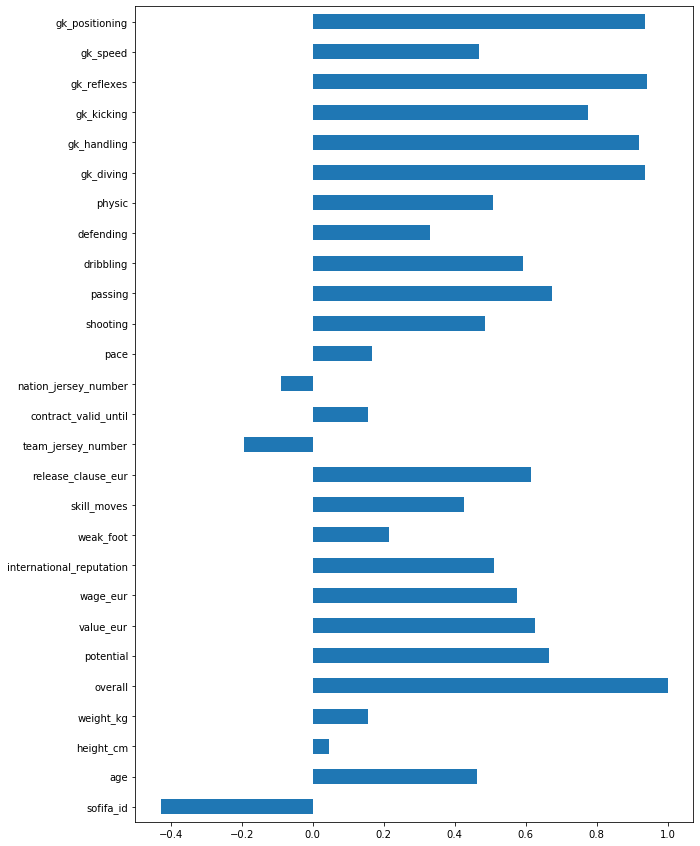

In [61]:
plt.figure(figsize=(10, 15))
fifa_19.corr()['overall'].plot.barh()
plt.show()

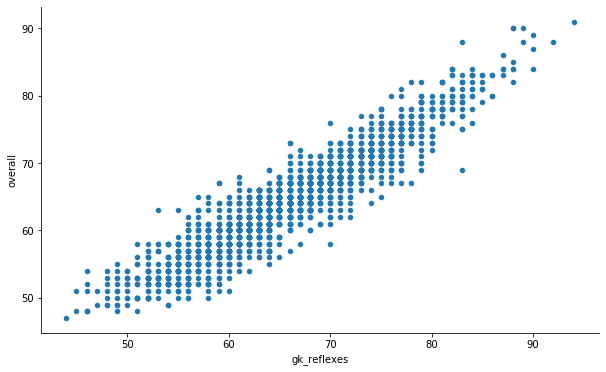

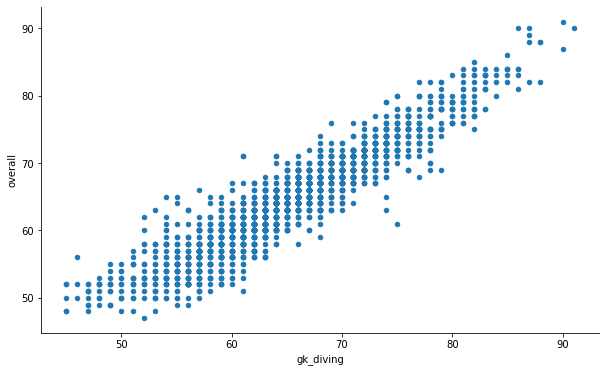

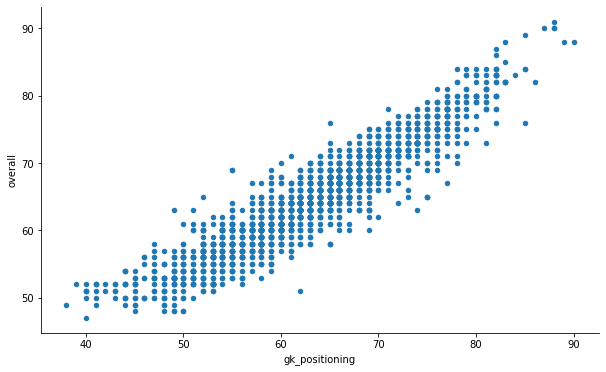

In [62]:
for c in corr.index[1:4]:
    ax = fifa_19.plot.scatter(c, 'overall', figsize=(10, 6))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

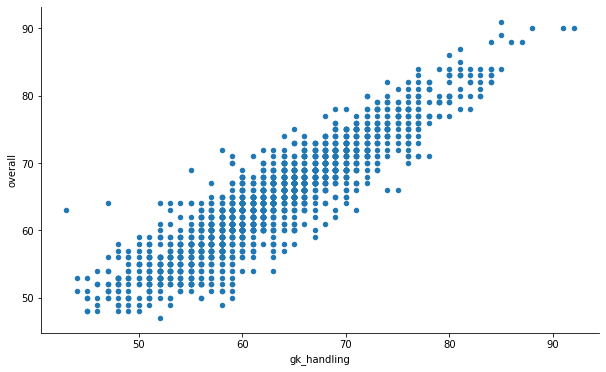

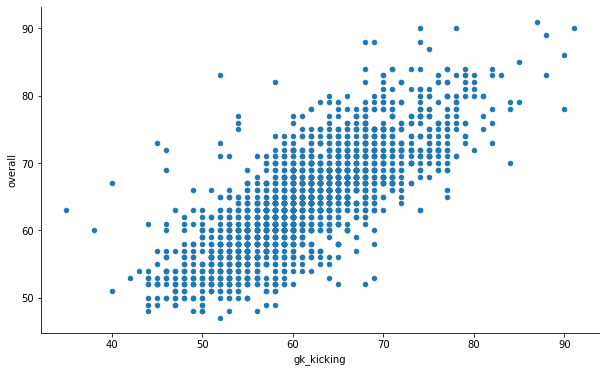

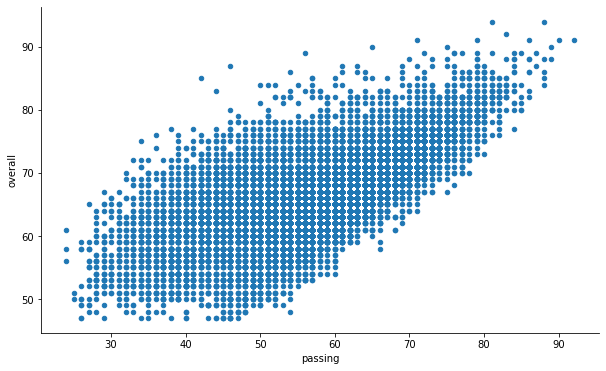

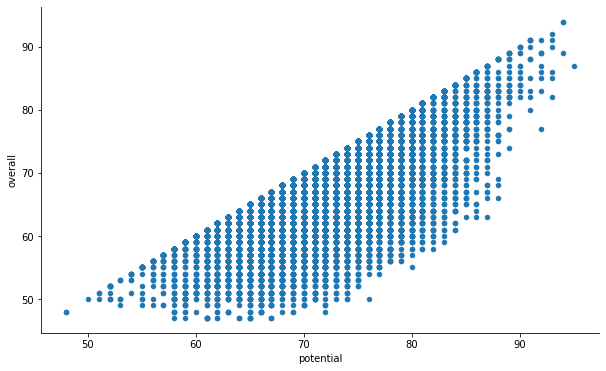

In [63]:
for c in corr.index[4:8]:
    ax = fifa_19.plot.scatter(c, 'overall', figsize=(10, 6))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

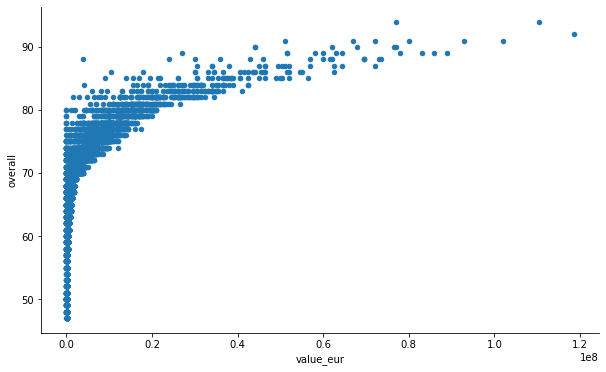

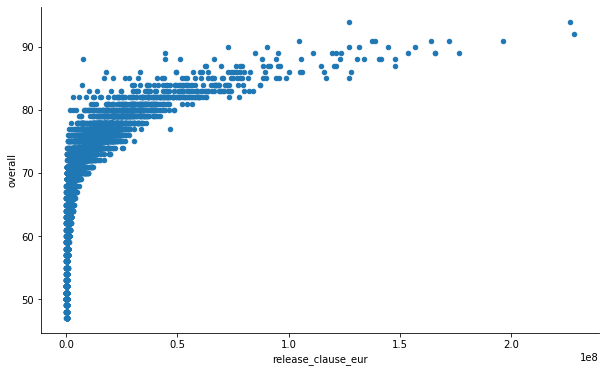

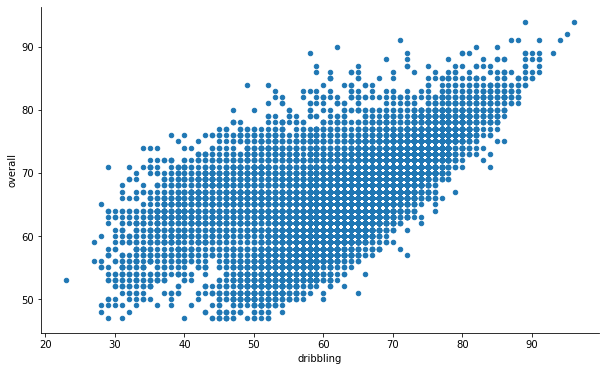

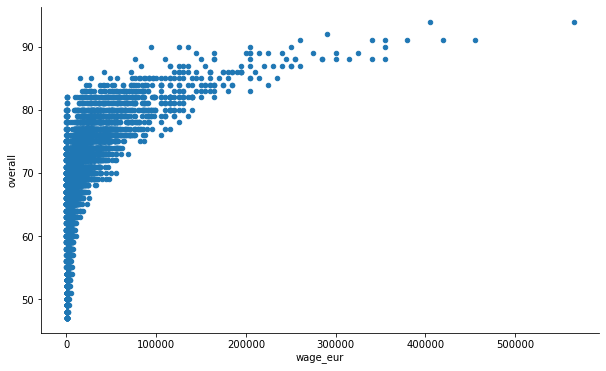

In [64]:
for c in corr.index[8:12]:
    ax = fifa_19.plot.scatter(c, 'overall', figsize=(10, 6))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

In [65]:
corr

overall                     1.000000
gk_reflexes                 0.940802
gk_diving                   0.936557
gk_positioning              0.935697
gk_handling                 0.919180
gk_kicking                  0.775417
passing                     0.672717
potential                   0.665131
value_eur                   0.626512
release_clause_eur          0.615678
dribbling                   0.591404
wage_eur                    0.574718
international_reputation    0.509023
physic                      0.508825
shooting                    0.483854
gk_speed                    0.469537
age                         0.463201
skill_moves                 0.425343
defending                   0.330530
weak_foot                   0.214208
pace                        0.167170
weight_kg                   0.155781
contract_valid_until        0.155550
height_cm                   0.044362
nation_jersey_number       -0.089330
team_jersey_number         -0.193632
sofifa_id                  -0.428689
N

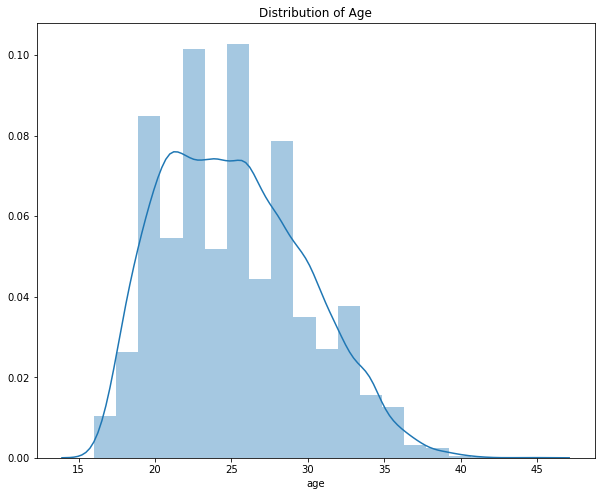

In [66]:
# Distribution of Age
# plt.figure(figsize=(10, 6))
sns.distplot(fifa_19.age, bins=20).set_title("Distribution of Age");

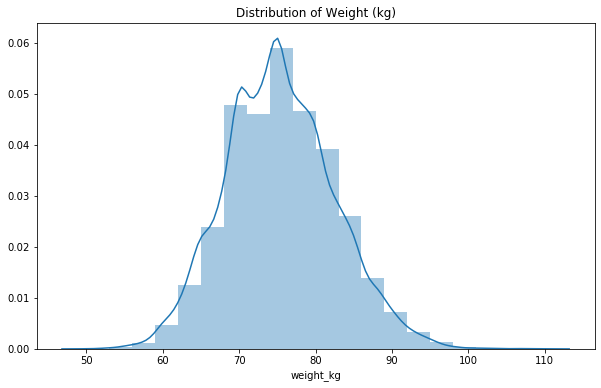

In [67]:
# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.distplot(fifa_19.weight_kg, bins=20).set_title("Distribution of Weight (kg)");

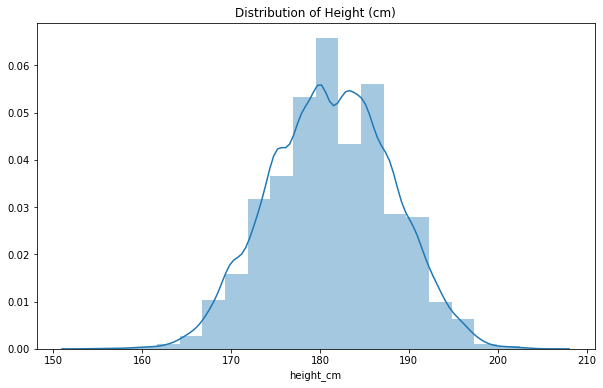

In [68]:
# Distribution of height
plt.figure(figsize=(10, 6))
sns.distplot(fifa_19.height_cm, bins=20).set_title("Distribution of Height (cm)");

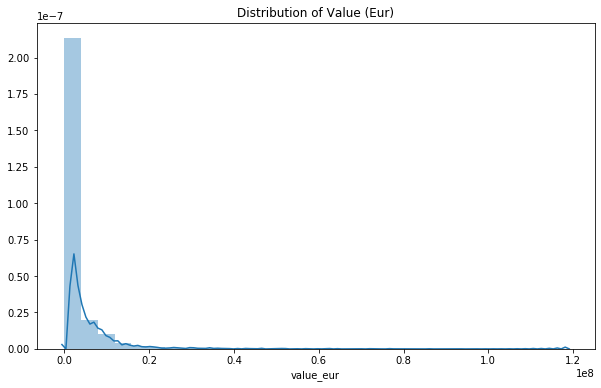

In [69]:
# Distribution of value_eur
plt.figure(figsize=(10, 6))
sns.distplot(fifa_19.value_eur, bins=30).set_title("Distribution of Value (Eur)");

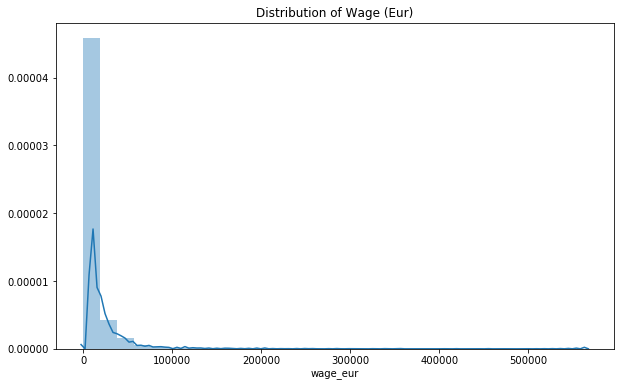

In [70]:
# Distribution of wage
plt.figure(figsize=(10, 6))
sns.distplot(fifa_19.wage_eur, bins=30).set_title("Distribution of Wage (Eur)");

In [71]:
fifa_19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,...,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,...,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,...,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,...,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,N

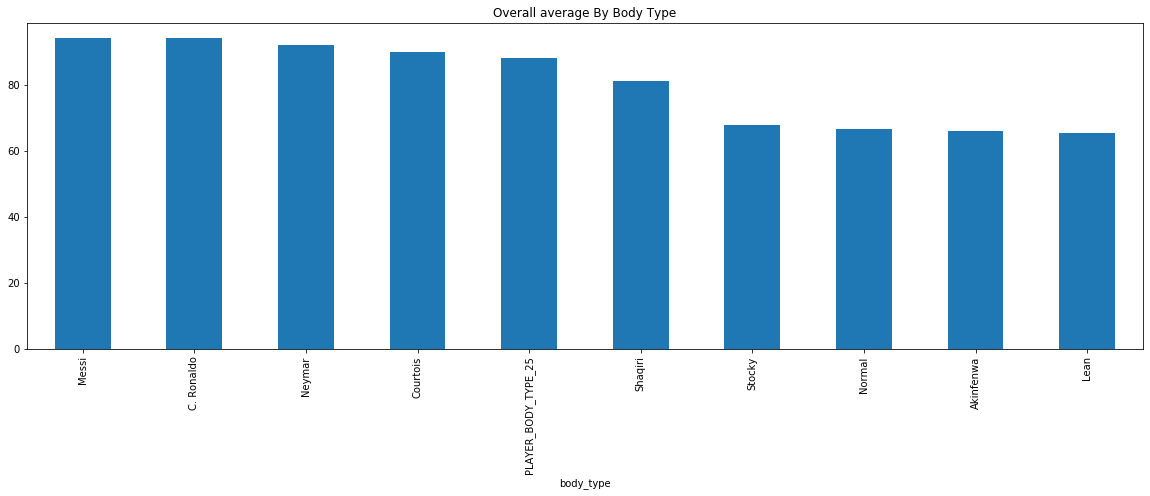

In [72]:
plt.figure(figsize=(20, 6))
ax = fifa_19.groupby('body_type')['overall'].mean().sort_values(ascending=False).plot.bar()
ax.set_title("Overall average By Body Type")
plt.show()

In [73]:
fifa_19.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,...,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,70,90,86,97,...,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Selfish, Flair, Speed Dribbler (CPU AI ...",79,87,62,84,84,96,...,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,94.0,58.0,88.0,"GK Long Throw, Saves with Feet",17,13,21,50,13,18,...,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,N

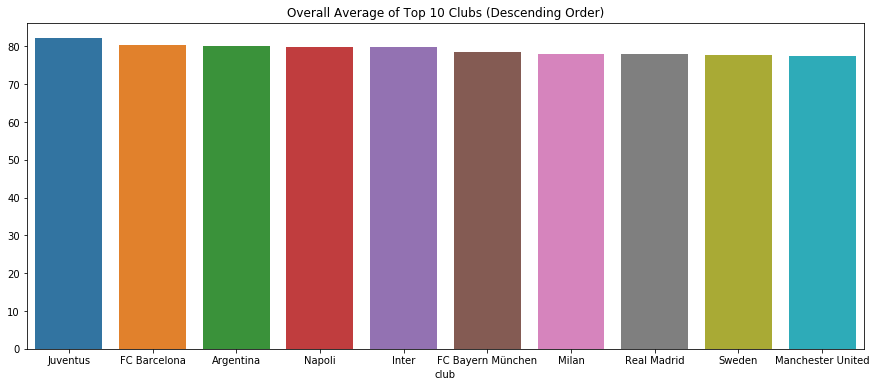

In [74]:
plt.figure(figsize=(15, 6))
sort_by_club = fifa_19.groupby('club')['overall'].mean().sort_values(ascending=False)
sns.barplot(sort_by_club.index[:10], sort_by_club.values[:10])
plt.title("Overall Average of Top 10 Clubs (Descending Order)");

In [75]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

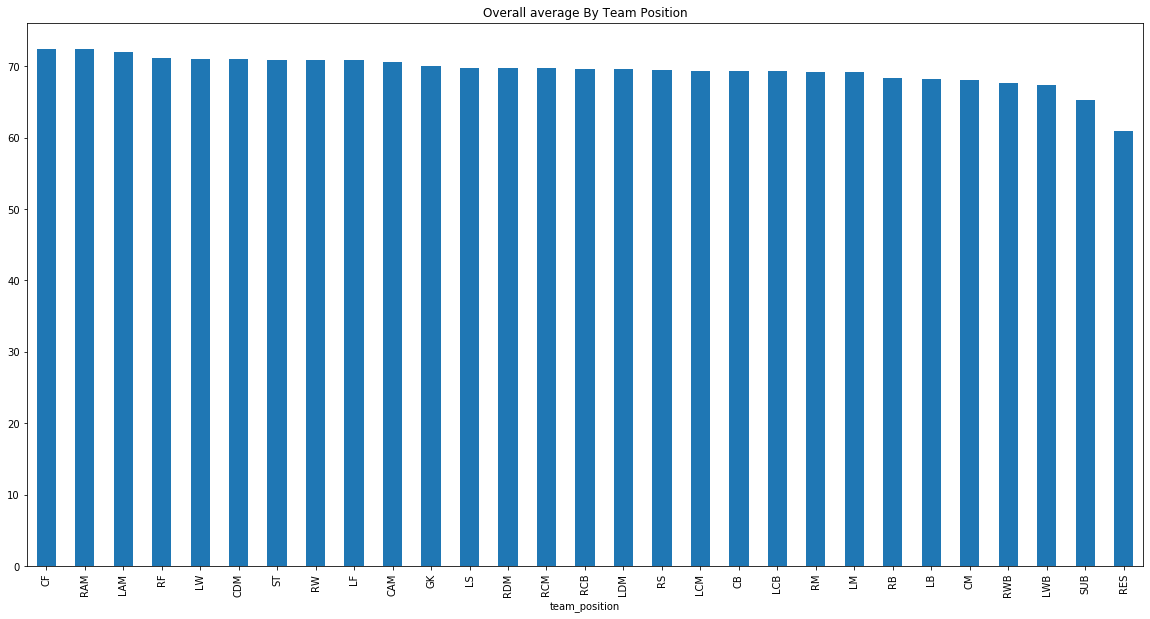

In [76]:
# plt.figure(figsize=(15, 6))
ax = fifa_19.groupby('team_position')['overall'].mean().sort_values(ascending=False).plot.bar()
ax.set_title("Overall average By Team Position")
plt.show()

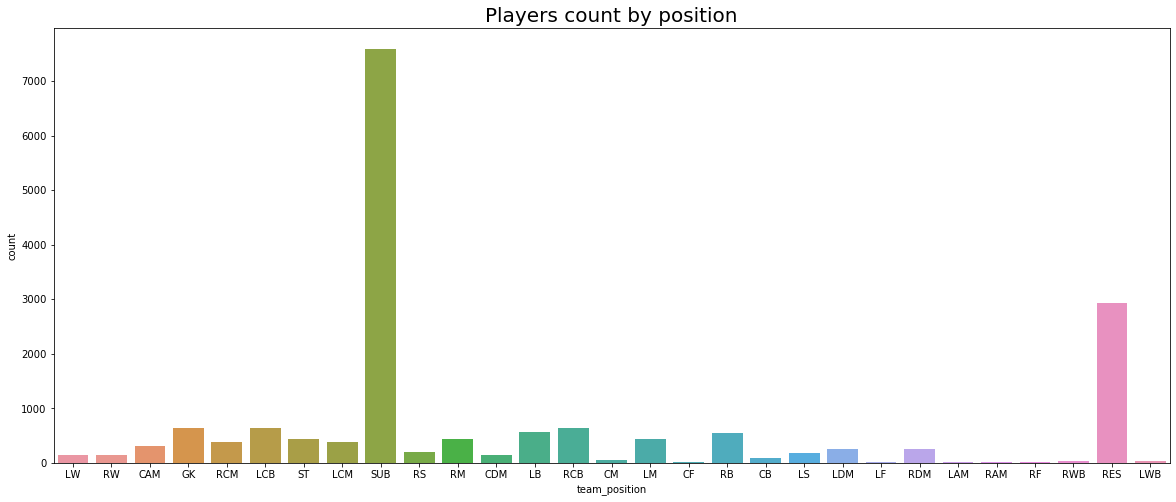

In [77]:
# Let's see the count of players by team position
plt.figure(figsize=(20, 8))
sns.countplot(fifa_19.team_position)
plt.title("Players count by position", fontsize=20);

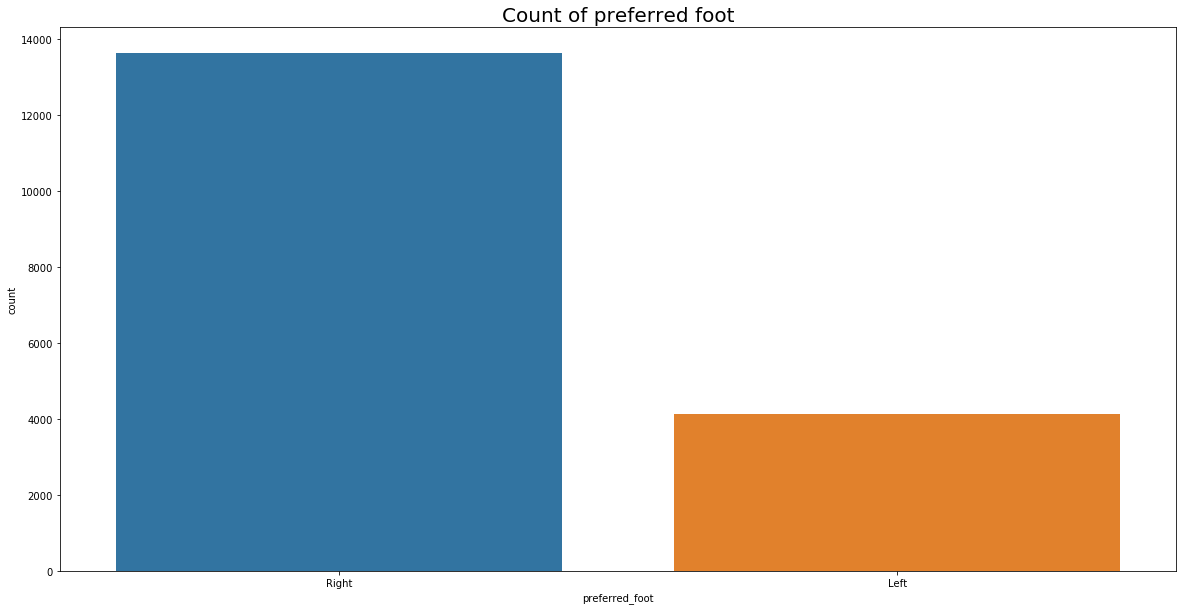

In [78]:
# count number of players by preferred foot
sns.countplot(fifa_19.preferred_foot)
plt.title("Count of preferred foot", fontsize=20);

In [79]:
fifa_19.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Diver, Flair, Long Shot Taker...",84,94,89,81,87,88,...,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


# Handling Missing Values

In [80]:
columns_to_drop = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'potential', 'real_face', 'loaned_from', 
                   'nation_jersey_number', 'joined', 'nationality', 'club', 'potential', 'player_tags', 
                   'team_jersey_number', 'player_traits', 'nation_position' ]

fifa_dropped = fifa_19.drop(columns_to_drop, axis=1)
fifa_dropped.shape

(17770, 88)

In [81]:
null_columns = []
for col in fifa_dropped.columns:
    if fifa_dropped[col].isna().any():
        null_columns.append(col)
    else:
        pass
print(null_columns)

['release_clause_eur', 'team_position', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


In [82]:
fifa_dropped[null_columns].isna().sum()

release_clause_eur       1513
team_position             223
contract_valid_until      223
pace                     1986
shooting                 1986
passing                  1986
dribbling                1986
defending                1986
physic                   1986
gk_diving               15784
gk_handling             15784
gk_kicking              15784
gk_reflexes             15784
gk_speed                15784
gk_positioning          15784
ls                       1986
st                       1986
rs                       1986
lw                       1986
lf                       1986
cf                       1986
rf                       1986
rw                       1986
lam                      1986
cam                      1986
ram                      1986
lm                       1986
lcm                      1986
cm                       1986
rcm                      1986
rm                       1986
lwb                      1986
ldm                      1986
cdm       

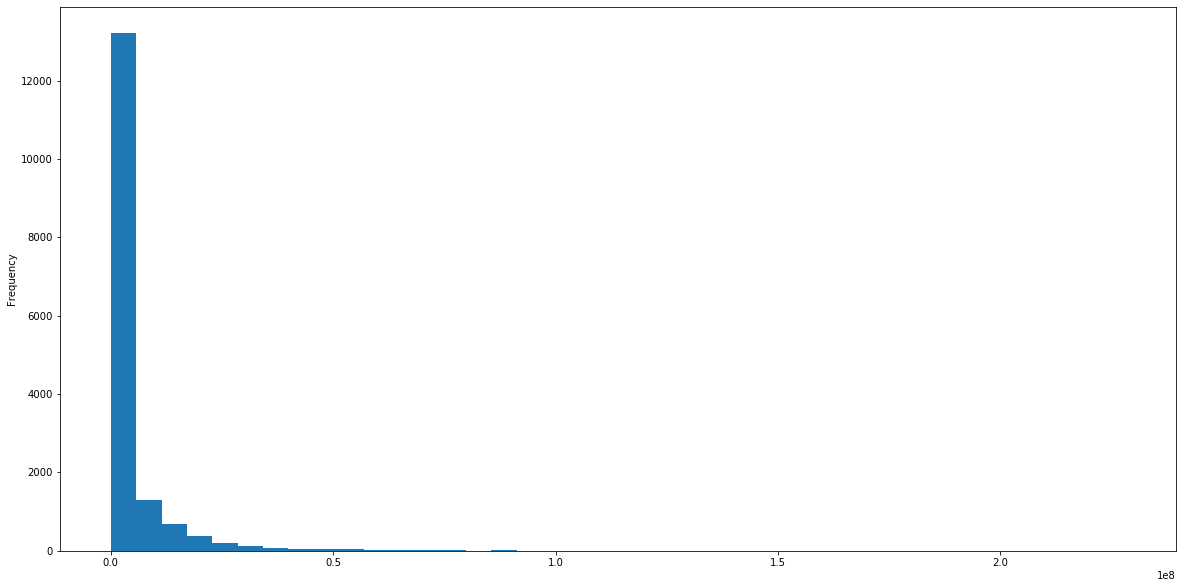

In [83]:
fifa_dropped.release_clause_eur.plot.hist(bins=40)

In [84]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
mode_cols = ['release_clause_eur', 'team_position', 'contract_valid_until']

fifa_dropped[mode_cols] = imp.fit_transform(fifa_dropped[mode_cols])

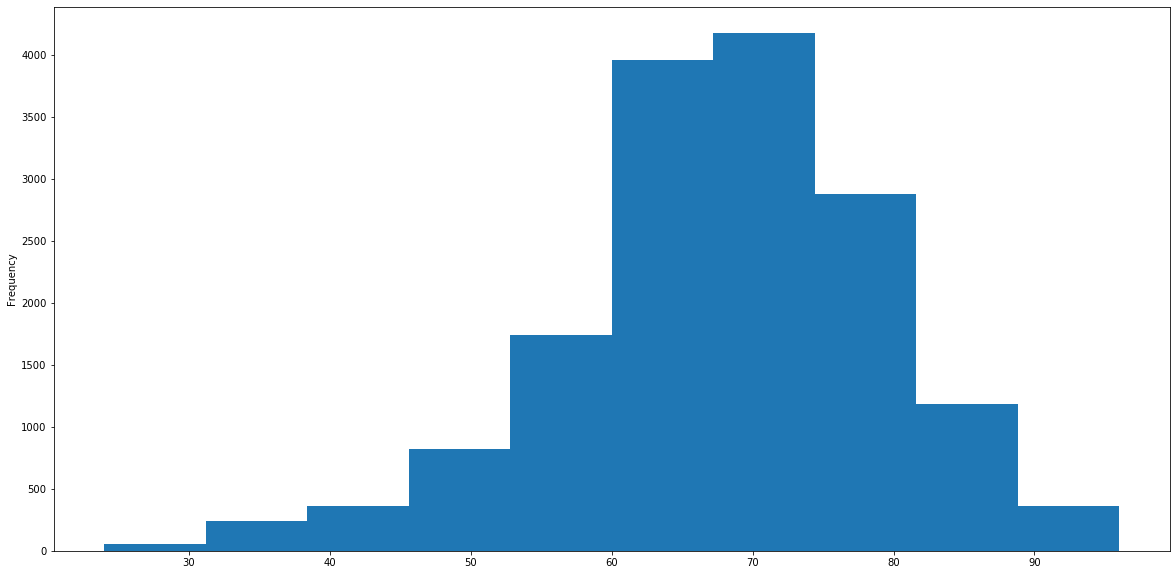

In [85]:
fifa_dropped.pace.plot.hist()

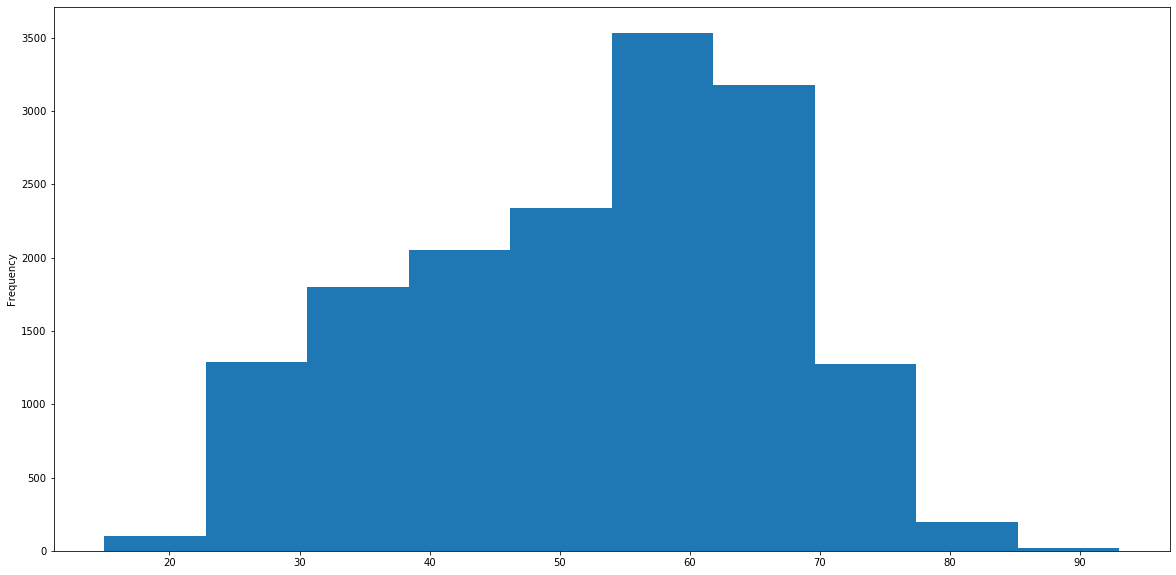

In [86]:
fifa_dropped.shooting.plot.hist();

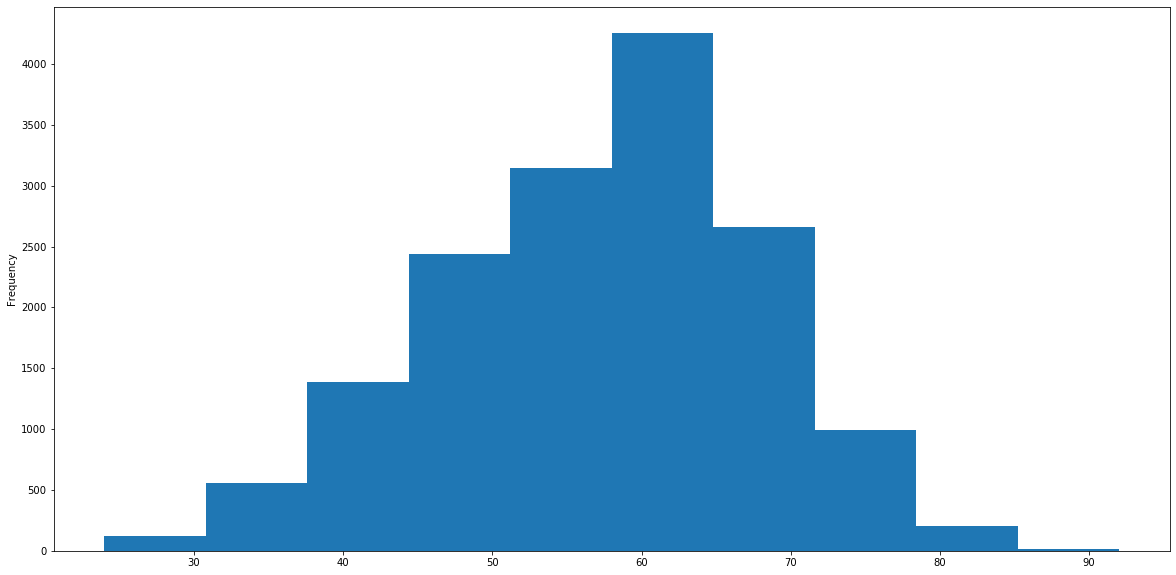

In [87]:
fifa_dropped.passing.plot.hist()

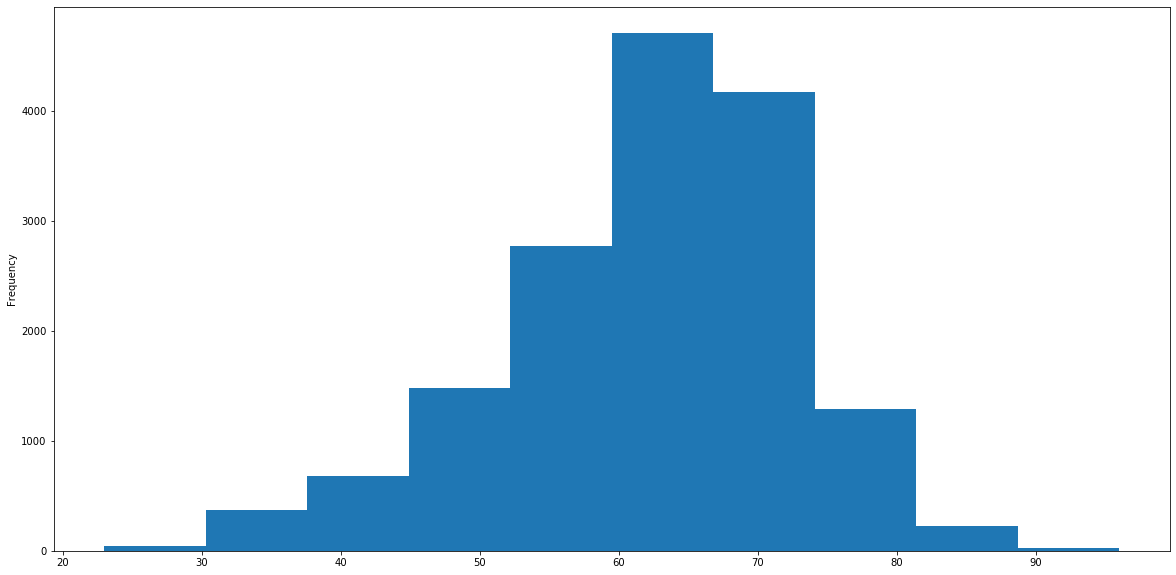

In [88]:
fifa_dropped.dribbling.plot.hist()

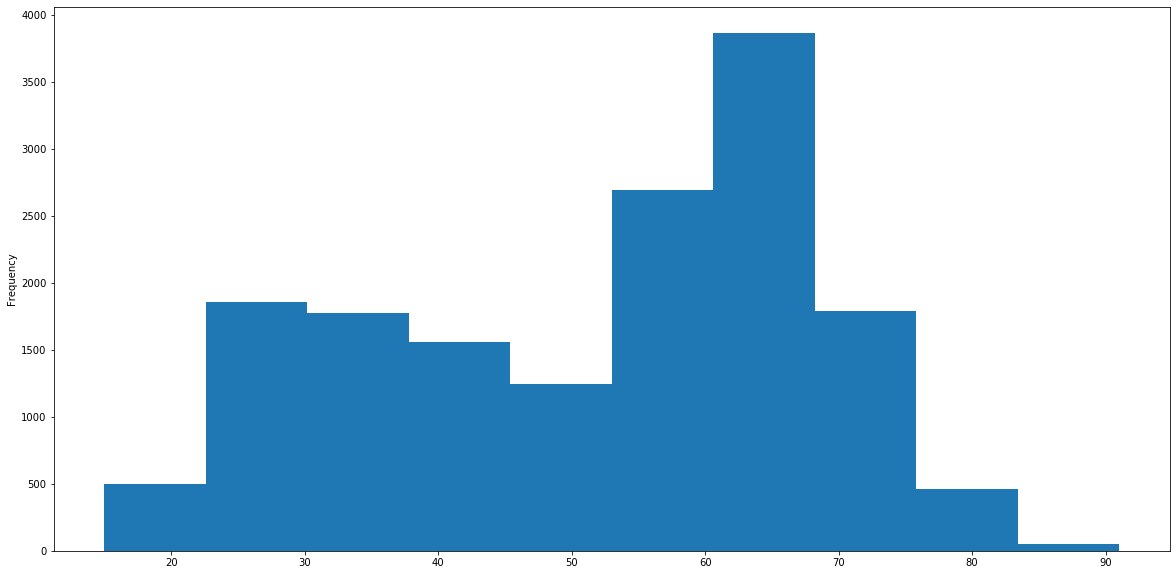

In [89]:
fifa_dropped.defending.plot.hist()

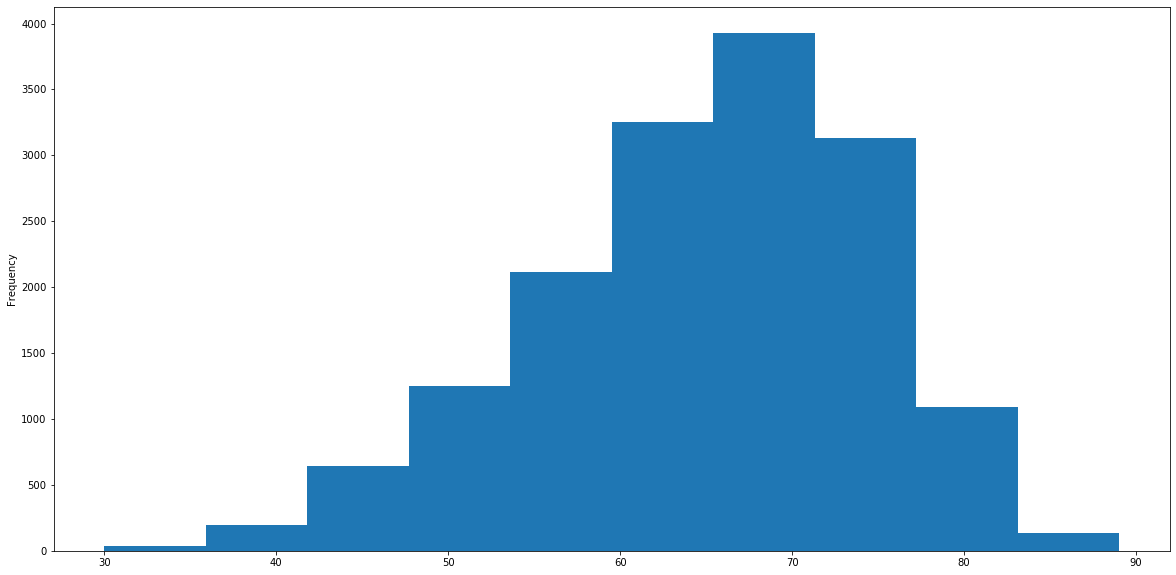

In [90]:
fifa_dropped.physic.plot.hist()

In [91]:
mean_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
imp_mean = SimpleImputer(strategy='mean')
fifa_dropped[mean_cols] = imp_mean.fit_transform(fifa_dropped[mean_cols])

In [92]:
fifa_dropped[null_columns].isna().sum()

release_clause_eur          0
team_position               0
contract_valid_until        0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
gk_diving               15784
gk_handling             15784
gk_kicking              15784
gk_reflexes             15784
gk_speed                15784
gk_positioning          15784
ls                       1986
st                       1986
rs                       1986
lw                       1986
lf                       1986
cf                       1986
rf                       1986
rw                       1986
lam                      1986
cam                      1986
ram                      1986
lm                       1986
lcm                      1986
cm                       1986
rcm                      1986
rm                       1986
lwb                      1986
ldm                      1986
cdm       

In [93]:
col_0 = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']
imp_0 = SimpleImputer(fill_value=0)
fifa_dropped[col_0] = imp_0.fit_transform(fifa_dropped[col_0])

In [94]:
fifa_dropped[null_columns].isna().sum()

release_clause_eur         0
team_position              0
contract_valid_until       0
pace                       0
shooting                   0
passing                    0
dribbling                  0
defending                  0
physic                     0
gk_diving                  0
gk_handling                0
gk_kicking                 0
gk_reflexes                0
gk_speed                   0
gk_positioning             0
ls                      1986
st                      1986
rs                      1986
lw                      1986
lf                      1986
cf                      1986
rf                      1986
rw                      1986
lam                     1986
cam                     1986
ram                     1986
lm                      1986
lcm                     1986
cm                      1986
rcm                     1986
rm                      1986
lwb                     1986
ldm                     1986
cdm                     1986
rdm           

In [95]:
mode_columns = fifa_dropped.columns[62:]

mode_imp = SimpleImputer(strategy='most_frequent')
fifa_dropped[mode_columns] = mode_imp.fit_transform(fifa_dropped[mode_columns])

In [96]:
fifa_dropped[null_columns].isna().sum()

release_clause_eur      0
team_position           0
contract_valid_until    0
pace                    0
shooting                0
passing                 0
dribbling               0
defending               0
physic                  0
gk_diving               0
gk_handling             0
gk_kicking              0
gk_reflexes             0
gk_speed                0
gk_positioning          0
ls                      0
st                      0
rs                      0
lw                      0
lf                      0
cf                      0
rf                      0
rw                      0
lam                     0
cam                     0
ram                     0
lm                      0
lcm                     0
cm                      0
rcm                     0
rm                      0
lwb                     0
ldm                     0
cdm                     0
rdm                     0
rwb                     0
lb                      0
lcb                     0
cb          

In [97]:
def extract(s):
    s = s.split('+')[0]
    return s
for col in fifa_dropped.columns[62:]:
    fifa_dropped[col] = fifa_dropped[col].apply(extract)

In [98]:
fifa_dropped[mode_columns] = fifa_dropped[mode_columns].astype(int)

In [99]:
fifa_dropped[mode_columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
1,88,88,88,92,93,93,93,92,93,93,93,90,84,84,84,90,63,61,61,61,63,58,47,47,47,58
2,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60
3,60,60,60,63,61,61,61,63,62,62,62,61,60,60,60,61,59,62,62,62,59,61,63,63,63,61
4,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


In [100]:
fifa_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         17770 non-null  int64  
 1   height_cm                   17770 non-null  int64  
 2   weight_kg                   17770 non-null  int64  
 3   overall                     17770 non-null  int64  
 4   value_eur                   17770 non-null  int64  
 5   wage_eur                    17770 non-null  int64  
 6   player_positions            17770 non-null  object 
 7   preferred_foot              17770 non-null  object 
 8   international_reputation    17770 non-null  int64  
 9   weak_foot                   17770 non-null  int64  
 10  skill_moves                 17770 non-null  int64  
 11  work_rate                   17770 non-null  object 
 12  body_type                   17770 non-null  object 
 13  release_clause_eur          177

In [101]:
# Remove player position column
fifa_dropped.drop('player_positions', axis=1, inplace=True)

In [102]:
fifa_dropped.goalkeeping_reflexes.unique()

array(['11', '8', '94', '13', '37', '9', '89', '88', '15', '10', '90',
       '6', '14', '3', '12', '83', '92', '5', '7', '4', '87', '82', '84',
       '86', '85', '2', '20', '43', '81', '79', '16', '78', '48', '77',
       '1', '80', '76', '83+3', '45', '75', '34', '74', '77-2', '73',
       '17', '70', '83+2', '72', '78+1', '77+1', '19', '72+2', '74-1',
       '75+1', '71', '66', '67', '71+1', '18', '75+2', '70-1', '69',
       '70-3', '23', '68', '72+4', '33', '77-1', '72-2', '70+1', '51',
       '69+1', '72+5', '64', '71-2', '21', '74+1', '59', '46', '71+2',
       '76+6', '72-1', '65', '68-3', '65-2', '61', '68-2', '62', '55',
       '68+1', '71-4', '67-4', '66-1', '14+13', '60', '63', '65-6',
       '67+3', '68+2', '63-4', '57', '63-2', '67-1', '58', '62-3', '53',
       '50', '66-2', '60-3', '66+2', '65+5', '65-1', '64+1', '64+5',
       '63+1', '56', '67+1', '65+1', '64-2', '63+5', '63+4', '25', '60+1',
       '61+6', '30', '61+1', '65+15', '54', '60-2', '52', '58+2', '59+1',
 

In [103]:
def extract_1(s):
    if s.find('+') != -1:
        return s.split('+')[0]
    if s.find('-'):
        return s.split('-')[0]
    return s

In [104]:
clean_cols = ['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

for col in clean_cols:
    fifa_dropped[col] = fifa_dropped[col].apply(extract_1)

In [105]:
fifa_dropped[clean_cols].head()

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
1,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
2,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13


In [106]:
fifa_dropped[clean_cols] = fifa_dropped[clean_cols].astype(int)

In [107]:
fifa_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 87 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         17770 non-null  int64  
 1   height_cm                   17770 non-null  int64  
 2   weight_kg                   17770 non-null  int64  
 3   overall                     17770 non-null  int64  
 4   value_eur                   17770 non-null  int64  
 5   wage_eur                    17770 non-null  int64  
 6   preferred_foot              17770 non-null  object 
 7   international_reputation    17770 non-null  int64  
 8   weak_foot                   17770 non-null  int64  
 9   skill_moves                 17770 non-null  int64  
 10  work_rate                   17770 non-null  object 
 11  body_type                   17770 non-null  object 
 12  release_clause_eur          17770 non-null  float64
 13  team_position               177

In [108]:
# OneHotEncode Categorical Variables
fifa_dummies = pd.get_dummies(fifa_dropped, drop_first=True)
fifa_dummies.shape

(17770, 129)

## Split into training and testing data

In [109]:
fifa_final = fifa_dummies.copy()
X = fifa_final.drop('overall', axis=1)
y = fifa_final.overall

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14216, 128), (3554, 128), (14216,), (3554,))

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

# Train different Models

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def display(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

In [113]:
# Linear Regression
lreg = LinearRegression()
lin_scores = cross_val_score(lreg, X_train_sc, y_train, cv=10, scoring='neg_mean_squared_error')
display(-lin_scores)

Scores: [3.90128229e+24 4.49886512e+00 2.44904091e+19 2.42945890e+25
 1.26379261e+24 4.45437501e+00 9.86569173e+25 4.36778279e+00
 4.20537523e+00 5.39520593e+24]
Mean: 1.335118116875281e+25
Std: 2.9303241171910596e+25


In [114]:
# KNeighborsRegressor
knn = KNeighborsRegressor()
knn_scores = cross_val_score(knn, X_train_sc, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
display(-knn_scores)

Scores: [3.85063291 3.77189873 3.88078762 3.63082982 3.81488045 3.68340366
 3.89137227 3.54910626 3.49325827 3.96444757]
Mean: 3.7530617569885507
Std: 0.14923564091776728


In [115]:
# RandomForerstRegressor
rf = RandomForestRegressor(n_estimators=30)
rf_scores = cross_val_score(rf, X_train_sc, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
display(-rf_scores)

Scores: [0.43179794 0.39849742 0.4871855  0.5085779  0.41494765 0.43731364
 0.3569247  0.37313785 0.41544218 0.4565439 ]
Mean: 0.42803686855539863
Std: 0.0449128589913456


## We can see that the Ranfom Forest performed way better than the other two, we can tune Random Forest for more better results

**Note:** This code can take more than 3 mins to execute

In [117]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_sc, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [118]:
best_rf = rf_random.best_estimator_
# RandomForerstRegressor
# rf = RandomForestRegressor(n_estimators=30)
rf_scores = cross_val_score(best_rf, X_train_sc, y_train, cv=10, scoring='neg_mean_squared_error')
display(-rf_scores)

Scores: [0.42646167 0.37663134 0.52306535 0.52446055 0.37463766 0.45640464
 0.36022756 0.33935084 0.40150501 0.43246626]
Mean: 0.4215210877331912
Std: 0.06114856807472379
